# Projet integrateur - Clustering 
siméon gaumart

## 1) Import, Generate, Display Graphs.

In [1]:
def extract_graph(pathg,pathl=False):
    """extract the nodes, the edges and communities from the txt data files.
    input : 
        pathg : the path for the txt data file : string
        pathl (not required) : the path for the txt labels file : string
    output : 
        node : the list of the nodes : list of int
        edge : the list of the edges : list of 2-tuple of int
        group : the list of the list of nodes in the same community : list of list of int OR False
    """

    fg=open(pathg,'r')
      
    lineg=fg.readlines()
    
    fg.close()
    
    edge=[]
    node=[]
    group=False
    
    for l in lineg:
        if len(l)>3:
            try:
                i=l.index('\t')
            except:
                i=l.index(' ')
            a=int(l[:i])
            b=int(l[i+1:])
            if a not in node:
                node.append(a)
            if b not in node:
                node.append(b)
            if (a,b) not in edge:
                edge.append((a,b))
                
    if pathl != False:
        
        fl=open(pathl,"r")
        linel=fl.readlines()
        fl.close()

        group=[]

        lb_buff=[]
        for l in linel:
            if len(l)>3:
                try:
                    i=l.index('\t')
                except:
                    i=l.index(' ')
                n=int(l[:i])
                lb=int(l[i+1:])
                if lb not in lb_buff:
                    lb_buff.append(lb)
                    group.append([n])
                else:
                    j=lb_buff.index(lb)
                    group[j].append(n)
    
    return node,edge,group


def draw_graph(node,edge,group=False):
    """draw the graph from the node, edges, and groups
    input :
        node : the list of the nodes : list of int
        edge : the list of the edges : list of 2-tuple of int
        group (not required): the list of the list of nodes in the same community : list of list of int
    output :
        None
    """
    try:
        nx
    except:
        import networkx as nx

    try:
        plt
    except:
        import matplotlib.pyplot as plt

    colormap = ["yellow","blue","red","green","purple"]

    if not group:
        group=[node]

    G=nx.Graph()

    G.add_nodes_from(node)
    color=[]
    for node in G:
        test=False
        i=0
        for gr in group:
            if test:
                continue
            else:
                if node in gr:
                    color.append(colormap[i%len(colormap)])
                    test=True
                i+=1

    G.add_edges_from(edge)

    nx.draw(G, node_color=color, with_labels = True)
    plt.show()


def draw_graph_file(pathg,pathl=False):
    """draw the graph from txt data files
    input : 
        pathg : the path for the txt data file : string
        pathl (not required) : the path for the txt labels file : string
    output : 
        None
    """

    nodes,edges,groups=extract_graph(pathg,pathl)

    draw_graph(nodes,edges,group=groups)
    
def random_graph_generator(nb_node,nb_community,psc=0.8,pdc=0.05):
    """generate a random community graph of variable number of nodes and communities
    input : 
        nb_node : number of nodes in the generated graph : int
        nb_community : number of communities (group) in the generated graph : int
        psc (not required) : probability to have an edge between two nodes of the same community : float
        pdc (not required) : probability to have an edge between two nodes of a different community : float
    output :
        node : the list of the nodes : list of int
        edge : the list of the edges : list of 2-tuple of int
        group : the list of the list of nodes in the same community : list of list of int
    """
    try:
        randint
    except:
        from random import randint
    
    node=[]
    edge=[]
    group=[]
    
    #node
    for i in range(nb_node):
        node.append(i)
        
    #group
    for i in range(nb_community):
        group.append([node[i]])
    for n in node[nb_community:]:
        lb=randint(0,nb_community-1)
        group[lb].append(n)
    
    #edge
    lg=len(group)
    for i1 in range(lg):
        for i2 in range(i1,lg):
            ln1=len(group[i1])
            ln2=len(group[i2])
            if i1 == i2:
                for j1 in range(ln1):
                    for j2 in range(j1+1,ln1):
                        r=randint(1,1000)
                        if r<int(psc*1000):
                            edge.append((group[i1][j1],group[i1][j2]))
            else:
                for j1 in range(ln1):
                    for j2 in range(ln2):
                        r=randint(1,1000)
                        if r<int(pdc*1000):
                            edge.append((group[i1][j1],group[i2][j2]))
    
    return node, edge, group



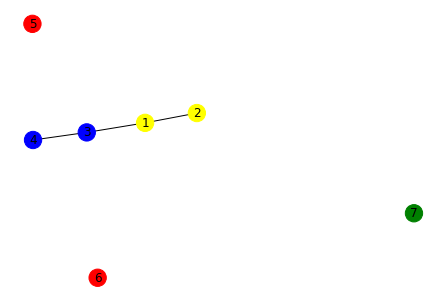

In [33]:
groups=[[1,2],[3,4],[5,6],[7]]
nodes=[1,2,3,4,5,6,7]
edges=[(1,2),(3,4),(1,3)]
draw_graph(nodes,edges,group=groups)

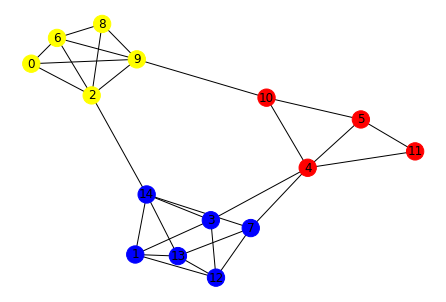

In [34]:
draw_graph_file(r"data/test_mini_graph/test_min_graph.txt",r"data/test_mini_graph/test_min_graph_labels.txt")

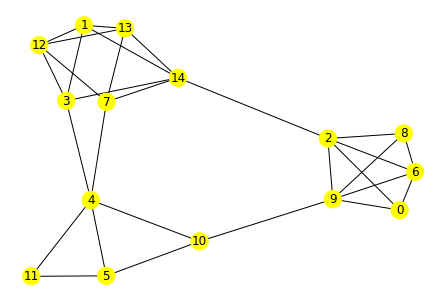

In [35]:
draw_graph_file(r"data/test_mini_graph/test_min_graph.txt")

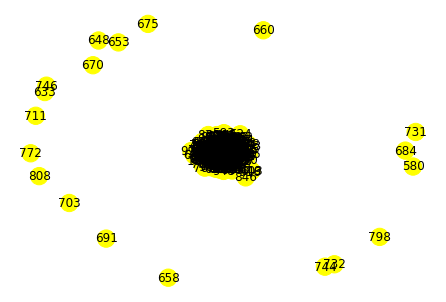

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [37]:
draw_graph_file(r"data/email-Eu-core.txt/email-Eu-core.txt")
print(extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt"))

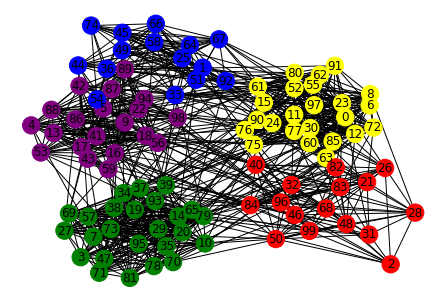

In [62]:
nodes,edges,groups=random_graph_generator(100,5)
draw_graph(nodes,edges,group=groups)

## 2) Extract features from graph

In [2]:
#Matrix n : Matrix[i] = label for node i
def label_matrix(node,group):
    """"""
    try:
        np
    except:
        import numpy as np
    
    n = len(node)
    
    M=np.zeros((n),dtype='uint64')
    
    l=1
    for g in group:
        M[g]=l
        l+=1
        
    return M

#transform a Label Matrix into group list
def matrix_to_group(Ml):
    """"""
    group = []
    ind =[]
    
    for i in range(len(Ml)):
        if Ml[i] in ind:
            group[ind.index(Ml[i])].append(i)
        else:
            group.append([i])
            ind.append(Ml[i])
            
    return group
    

###########################################################################
        

#Matrix n x n : Matrix[i,j] = 1 if node j is a neighbour of i, 0 else
def into_matrix_nn(node,edge):
    """"""
    try:
        np
    except:
        import numpy as np
        
    n=len(node)
    
    M=np.zeros((n,n),dtype='uint8')
    
    for e in edge:
        i,j=e
        if i!=j:
            M[i,j]=1
            M[j,i]=1
    
    
#     for i in range(n):
#         for j in range(i+1,n):
#             if (node[i],node[j]) in edge or (node[j],node[i]) in edge :
#                 M[node[i],node[j]]=1
#                 M[node[j],node[i]]=1
                
    return M
            
    
    

In [47]:
node,edge,group=extract_graph(r"data/test_mini_graph/test_min_graph.txt",r"data/test_mini_graph/test_min_graph_labels.txt")
M=into_matrix_nn(node,edge)
Ml=label_matrix(node,group)
print(M)
print(Ml)
print(len(Ml))
print(matrix_to_group(Ml))

[[0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 1 1]
 [1 0 0 0 0 0 1 0 1 1 0 0 0 0 1]
 [0 1 0 0 1 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 1 0 1 0 1 0 0 1 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 1 0 0 0]
 [1 0 1 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 1 1]
 [0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 1 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 1 0 1]
 [0 1 1 1 0 0 0 1 0 0 0 0 0 1 0]]
[1 2 1 2 3 3 1 2 1 1 3 3 2 2 2]
15
[[0, 2, 6, 8, 9], [1, 3, 7, 12, 13, 14], [4, 5, 10, 11]]


## 3) Clustering Methods

In [3]:
#A lancer avant les tests
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
#! conda install -c conda-forge hdbscan
import hdbscan
import numpy as np
import networkx as nx
from random import randint
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import *
import sys

### Kmeans

C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


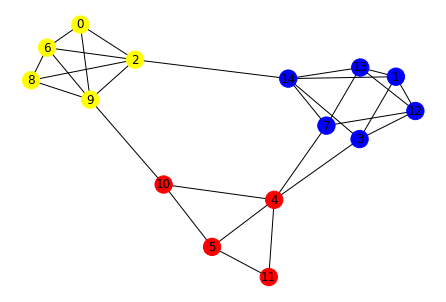

precision score :  0.0
adjusted random score :  1.0


In [26]:
#test sur un petit graph

node,edge,group=extract_graph(r"data/test_mini_graph/test_min_graph.txt",r"data/test_mini_graph/test_min_graph_labels.txt")

Mdata=into_matrix_nn(node,edge)

Mlabel=label_matrix(node, group)

kmeans=KMeans(n_clusters=3).fit(Mdata)

LABELS=kmeans.labels_

predictgroup=matrix_to_group(LABELS)

draw_graph(node,edge,predictgroup)

print("precision score : ",precision_score(Mlabel,LABELS,average='micro'))
print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

TIME generate graph (sec): 0.7451236248016357
TIME extract features (sec): 0.015648841857910156
TIME extract labels (sec): 0.0
TIME perform kmeans (sec): 0.44243454933166504
TIME labels into groups (sec): 0.0


C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


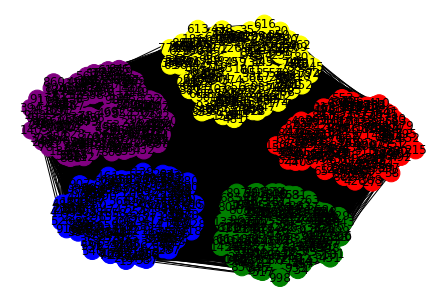

adjusted random score :  1.0
Wall time: 13.4 s


In [27]:
%%time
#test sur un graphe aléatoire plus grand

s=time()
node,edge,group=random_graph_generator(1000,5)
e=time()
print("TIME generate graph (sec):",e-s)

s=time()
Mdata=into_matrix_nn(node,edge)
e=time()
print("TIME extract features (sec):",e-s)

s=time()
Mlabel=label_matrix(node, group)
e=time()
print("TIME extract labels (sec):",e-s)

s=time()
kmeans=KMeans(n_clusters=5).fit(Mdata)
e=time()
print("TIME perform kmeans (sec):",e-s)

LABELS=kmeans.labels_

s=time()
predictgroup=matrix_to_group(LABELS)
e=time()
print("TIME labels into groups (sec):",e-s)

draw_graph(node,edge,predictgroup)

print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

TIME generate graph (sec): 8.165245771408081
TIME extract features (sec): 0.0
TIME extract labels (sec): 0.0
TIME perform kmeans (sec): 1.8367338180541992
TIME labels into groups (sec): 0.0


C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


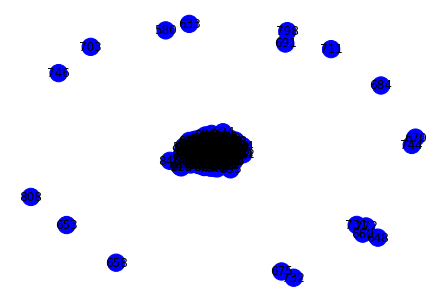

cluster number :  42
adjusted random score :  0.0630184391989669
21 21 21 21
Wall time: 18.3 s


In [35]:
%%time
#test sur un vrai graphe

s=time()
node,edge,group=extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt",r"data/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt")
e=time()
print("TIME generate graph (sec):",e-s)

nbcluster=len(group)

s=time()
Mdata=into_matrix_nn(node,edge)
e=time()
print("TIME extract features (sec):",e-s)

s=time()
Mlabel=label_matrix(node, group)
e=time()
print("TIME extract labels (sec):",e-s)

s=time()
kmeans=KMeans(n_clusters=nbcluster).fit(Mdata)
e=time()
print("TIME perform kmeans (sec):",e-s)

LABELS=kmeans.labels_

s=time()
predictgroup=matrix_to_group(LABELS)
e=time()
print("TIME labels into groups (sec):",e-s)

draw_graph(node,edge,predictgroup)

print("cluster number : ",nbcluster)
print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))
print(LABELS[772],LABELS[731],LABELS[684],LABELS[798])

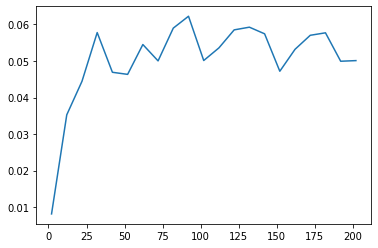

Wall time: 2min 29s


In [14]:
%%time
#test avec differents nombre de cluster

node,edge,group=extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt",r"data/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt")
score=[]
nbclus=[]

Mdata=into_matrix_nn(node,edge)
Mlabel=label_matrix(node, group)

for i in range(2,203,10):
    nbcluster=i
    nbclus.append(i)

    kmeans=KMeans(n_clusters=nbcluster).fit(Mdata)
    LABELS=kmeans.labels_

    predictgroup=matrix_to_group(LABELS)
    score.append(adjusted_rand_score(Mlabel,LABELS))
    
plt.plot(nbclus,score)
plt.show()

Certains nodes n'ont pas de voisins, ils sont donc tous mis dans un même cluster (car la distance entre eux est nulle avec la matrice des voisins).<br>
Solutions possibles :
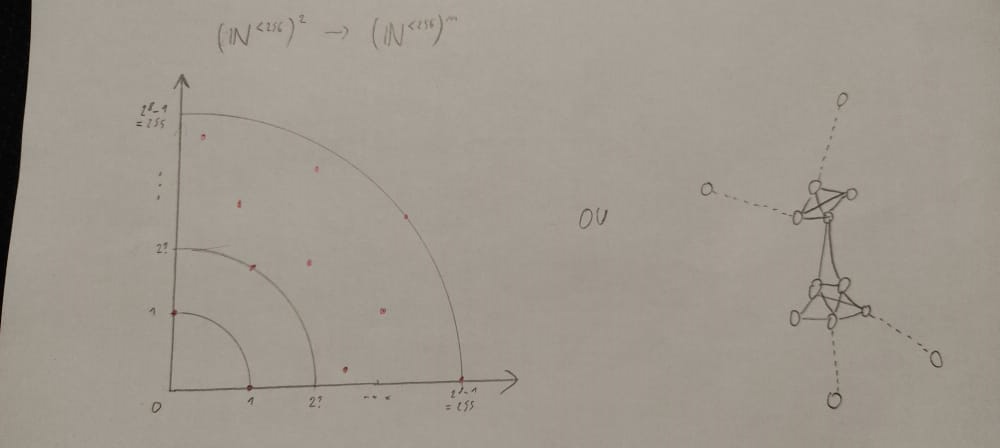

In [4]:
#implémentation des solutions

#ne fonctionne pas si le nombre de node isolé est supérieur a 253 (car uint8)
def sprawl_linear(M):
    """"""
    
    n=len(M)
    i=0
    isol=[]
    for v in M[:]:
        if 1 not in v:
            isol.append(i)
        i+=1
    
    n_isol=len(isol)
    #print("nombre de node isole :",n_isol)
    if n_isol!=0:
        step=int((255-2)/n_isol)
        val=2

        for no in isol:
            M[no]=val
            val+=step
    
    return M

def sprawl_random(M):
    """"""
    
    try:
        randint
    except:
        from random import randint
        
    n=len(M)
    i=0
    isol=[]
    for v in M[:]:
        if 1 not in v:
            isol.append(i)
        i+=1
    
    #n_isol=len(isol)
    
    for no in isol:
        for j in range(n):
            M[no,j]=randint(2,255)
    
    return M

def virtual_edge(M):
    """"""
    
    try:
        randint
    except:
        from random import randint
        
    n=len(M)
    i=0
    isol=[]
    for v in M[:]:
        if 1 not in v:
            isol.append(i)
        i+=1
    
    #n_isol=len(isol)
    
    for no in isol:
        j=randint(0,n-1)
        M[no,j]=1
        
    return M
    
    
             

In [10]:
node,edge,group=extract_graph(r"data/test_mini_graph/test_min_graph.txt",r"data/test_mini_graph/test_min_graph_labels.txt")
M=into_matrix_nn(node,edge)
Ml=label_matrix(node,group)
print(M)
print(Ml)
print(len(M))
print(matrix_to_group(Ml))
M[0]=0
M[1]=0
M[3]=0
Ms=virtual_edge(M)
print(Ms)

[[0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 1 1]
 [1 0 0 0 0 0 1 0 1 1 0 0 0 0 1]
 [0 1 0 0 1 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 1 0 1 0 1 0 0 1 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 1 0 0 0]
 [1 0 1 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 1 1]
 [0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 1 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 1 0 1]
 [0 1 1 1 0 0 0 1 0 0 0 0 0 1 0]]
[1 2 1 2 3 3 1 2 1 1 3 3 2 2 2]
15
[[0, 2, 6, 8, 9], [1, 3, 7, 12, 13, 14], [4, 5, 10, 11]]
[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 1 1 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 1 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 1 0 0 0]
 [1 0 1 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 1 1]
 [0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 

TIME generate graph (sec): 8.262433767318726
TIME extract features (sec): 0.0
nombre de node isole : 19
TIME sprawl linear (sec): 0.0
TIME extract labels (sec): 0.015594959259033203
TIME perform kmeans (sec): 1.8375723361968994
TIME labels into groups (sec): 0.0


C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


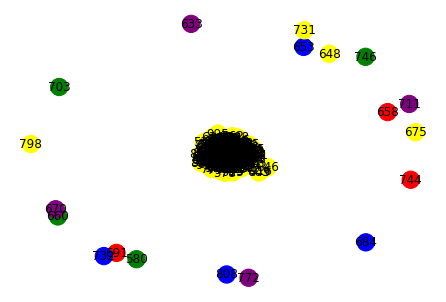

cluster number :  42
adjusted random score :  0.0462903435381641
17 4 10 6
Wall time: 18 s


In [38]:
%%time
#test sur un vrai graphe avec sprawl_linear

s=time()
node,edge,group=extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt",r"data/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt")
e=time()
print("TIME generate graph (sec):",e-s)

nbcluster=len(group)
#nbcluster=50

s=time()
Mdata=into_matrix_nn(node,edge)
e=time()
print("TIME extract features (sec):",e-s)

s=time()
Mdata=sprawl_linear(Mdata)
e=time()
print("TIME sprawl linear (sec):",e-s)

s=time()
Mlabel=label_matrix(node, group)
e=time()
print("TIME extract labels (sec):",e-s)

s=time()
kmeans=KMeans(n_clusters=nbcluster).fit(Mdata)
e=time()
print("TIME perform kmeans (sec):",e-s)

LABELS=kmeans.labels_

s=time()
predictgroup=matrix_to_group(LABELS)
e=time()
print("TIME labels into groups (sec):",e-s)

draw_graph(node,edge,predictgroup)

print("cluster number : ",nbcluster)
print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))
print(LABELS[772],LABELS[731],LABELS[684],LABELS[798])

TIME generate graph (sec): 18.734680891036987
TIME extract features (sec): 0.015622615814208984
TIME sprawl random (sec): 0.06248354911804199
TIME extract labels (sec): 0.0
TIME perform kmeans (sec): 3.442103624343872
TIME labels into groups (sec): 0.0


C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


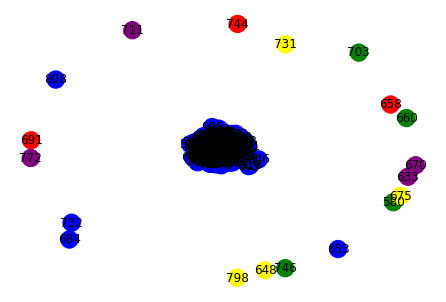

cluster number :  42
adjusted random score :  0.04765206193891132
Wall time: 40.7 s


In [7]:
%%time
#test sur un vrai graphe avec sprawl_random

s=time()
node,edge,group=extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt",r"data/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt")
e=time()
print("TIME generate graph (sec):",e-s)

nbcluster=len(group)
#nbcluster=50

s=time()
Mdata=into_matrix_nn(node,edge)
e=time()
print("TIME extract features (sec):",e-s)

s=time()
Mdata=sprawl_random(Mdata)
e=time()
print("TIME sprawl random (sec):",e-s)

s=time()
Mlabel=label_matrix(node, group)
e=time()
print("TIME extract labels (sec):",e-s)

s=time()
kmeans=KMeans(n_clusters=nbcluster).fit(Mdata)
e=time()
print("TIME perform kmeans (sec):",e-s)

LABELS=kmeans.labels_

s=time()
predictgroup=matrix_to_group(LABELS)
e=time()
print("TIME labels into groups (sec):",e-s)

draw_graph(node,edge,predictgroup)

print("cluster number : ",nbcluster)
print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

TIME generate graph (sec): 19.73703908920288
TIME extract features (sec): 0.016419410705566406
TIME virtual_edge (sec): 0.015340805053710938
TIME extract labels (sec): 0.0042798519134521484
TIME perform kmeans (sec): 3.4200100898742676
TIME labels into groups (sec): 0.0


C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


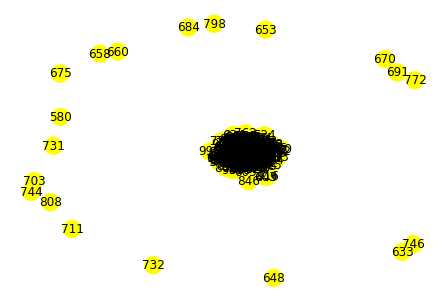

cluster number :  42
adjusted random score :  0.056226711301377234
Wall time: 41.8 s


In [11]:
%%time
#test sur un vrai graphe avec virtual_edge
#NE SEPARE PAS LES NODES ISOLES DANS DIFFERENTS CLUSTERS?

s=time()
node,edge,group=extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt",r"data/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt")
e=time()
print("TIME generate graph (sec):",e-s)

nbcluster=len(group)
#nbcluster=50

s=time()
Mdata=into_matrix_nn(node,edge)
e=time()
print("TIME extract features (sec):",e-s)

s=time()
Mdata=virtual_edge(Mdata)
e=time()
print("TIME virtual_edge (sec):",e-s)

s=time()
Mlabel=label_matrix(node, group)
e=time()
print("TIME extract labels (sec):",e-s)

s=time()
kmeans=KMeans(n_clusters=nbcluster).fit(Mdata)
e=time()
print("TIME perform kmeans (sec):",e-s)

LABELS=kmeans.labels_

s=time()
predictgroup=matrix_to_group(LABELS)
e=time()
print("TIME labels into groups (sec):",e-s)

draw_graph(node,edge,predictgroup)

print("cluster number : ",nbcluster)
print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

nombre de node isole : 19


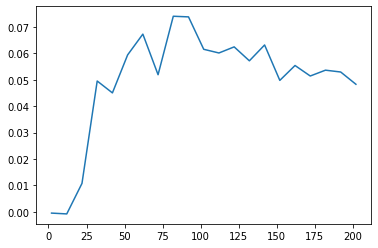

Wall time: 1min 23s


In [40]:
%%time
#test avec differents nombre de cluster avec sprawl_linear

node,edge,group=extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt",r"data/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt")
score=[]
nbclus=[]

Mdata=into_matrix_nn(node,edge)
Mdata=sprawl_linear(Mdata)
Mlabel=label_matrix(node, group)

for i in range(2,203,10):
    nbcluster=i
    nbclus.append(i)

    kmeans=KMeans(n_clusters=nbcluster).fit(Mdata)
    LABELS=kmeans.labels_

    predictgroup=matrix_to_group(LABELS)
    score.append(adjusted_rand_score(Mlabel,LABELS))
    
plt.plot(nbclus,score)
plt.show()
    

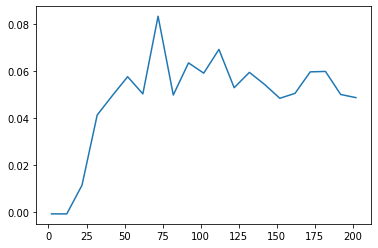

Wall time: 2min 28s


In [8]:
%%time
#test avec differents nombre de cluster avec sprawl_random

node,edge,group=extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt",r"data/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt")
score=[]
nbclus=[]

Mdata=into_matrix_nn(node,edge)
Mdata=sprawl_random(Mdata)
Mlabel=label_matrix(node, group)

for i in range(2,203,10):
    nbcluster=i
    nbclus.append(i)

    kmeans=KMeans(n_clusters=nbcluster).fit(Mdata)
    LABELS=kmeans.labels_

    predictgroup=matrix_to_group(LABELS)
    score.append(adjusted_rand_score(Mlabel,LABELS))
    
plt.plot(nbclus,score)
plt.show()

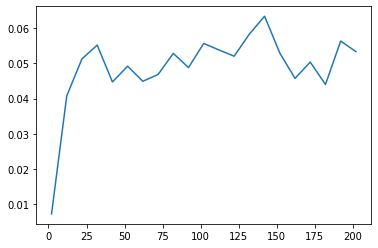

Wall time: 2min 33s


In [13]:
%%time
#test avec differents nombre de cluster avec virtual_edge

node,edge,group=extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt",r"data/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt")
score=[]
nbclus=[]

Mdata=into_matrix_nn(node,edge)
Mdata=virtual_edge(Mdata)
Mlabel=label_matrix(node, group)

for i in range(2,203,10):
    nbcluster=i
    nbclus.append(i)

    kmeans=KMeans(n_clusters=nbcluster).fit(Mdata)
    LABELS=kmeans.labels_

    predictgroup=matrix_to_group(LABELS)
    score.append(adjusted_rand_score(Mlabel,LABELS))
    
plt.plot(nbclus,score)
plt.show()

<div class="alert alert-block alert-danger">
    
Kmeans fonctionne bien sur les graphs où tous les nodes d'une même communauté ont tous beaucoup de liens entre eux et beaucoup moins avec les nodes d'autres communautés, comme les graphes générés aléatoirement avec la fonction `random_graph_generator`.
Pour le graph réel des emails, certains nodes sont isolés mais appartiennent à une communauté, et la densité de liens entre les différentes communautés n'est pas forcément la même, ce qui rend kmeans très peu efficace sur ce graph, même avec utilisation des méthodes `sprawl_linear`, `sprawl_random` et `virtual_edge`
<br>
...
    
</div>

### Agglomerative Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

C:\Users\sgaumi_\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:463: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\sgaumi_\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:463: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\sgaumi_\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:463: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\sgaumi_\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observati

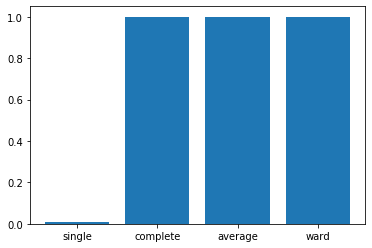

In [18]:
#test sur un petit graph

link=['single','complete','average','ward']

node,edge,group=extract_graph(r"data/test_mini_graph/test_min_graph.txt",r"data/test_mini_graph/test_min_graph_labels.txt")

Mdata=into_matrix_nn(node,edge)

Mlabel=label_matrix(node, group)

score=[]

for li in link:

    ac=AgglomerativeClustering(n_clusters=3,linkage=li,affinity='euclidean').fit(Mdata)

    LABELS=ac.labels_

    #predictgroup=matrix_to_group(LABELS)
    
    score.append(adjusted_rand_score(Mlabel,LABELS))

#draw_graph(node,edge,predictgroup)

plt.bar(link,score)
plt.show()

TIME generate graph (sec): 1.5039870738983154
TIME extract features (sec): 0.06244540214538574
TIME extract labels (sec): 0.0


C:\Users\sgaumi_\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:463: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


TIME perform Agglomerative Clustering (linkage=single) (sec): 1.394340991973877
adjusted_random_score (linkage=single) : 1.0


C:\Users\sgaumi_\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:463: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


TIME perform Agglomerative Clustering (linkage=complete) (sec): 1.399470329284668
adjusted_random_score (linkage=complete) : 1.0


C:\Users\sgaumi_\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:463: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


TIME perform Agglomerative Clustering (linkage=average) (sec): 1.397355079650879
adjusted_random_score (linkage=average) : 1.0


C:\Users\sgaumi_\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


TIME perform Agglomerative Clustering (linkage=ward) (sec): 1.3927700519561768
adjusted_random_score (linkage=ward) : 1.0


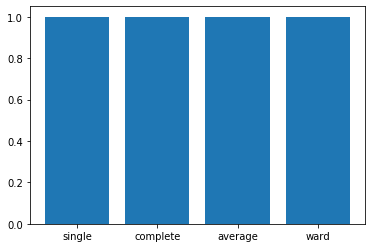

Wall time: 7.32 s


In [24]:
%%time
#test sur un graphe aléatoire plus grand

link=['single','complete','average','ward']

s=time()
node,edge,group=random_graph_generator(1000,5)
e=time()
print("TIME generate graph (sec):",e-s)

s=time()
Mdata=into_matrix_nn(node,edge)
e=time()
print("TIME extract features (sec):",e-s)

s=time()
Mlabel=label_matrix(node, group)
e=time()
print("TIME extract labels (sec):",e-s)

score=[]
for li in link:
    
    s=time()
    ac=AgglomerativeClustering(n_clusters=5,linkage=li,affinity='euclidean').fit(Mdata)
    e=time()
    print("TIME perform Agglomerative Clustering (linkage={}) (sec): {}".format(li,e-s))

    LABELS=ac.labels_
    
    sc=adjusted_rand_score(Mlabel,LABELS)
    print("adjusted_random_score (linkage={}) : {}".format(li,sc))
    score.append(sc)

# s=time()
# predictgroup=matrix_to_group(LABELS)
# e=time()
# print("TIME labels into groups (sec):",e-s)

# draw_graph(node,edge,predictgroup)

# print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

plt.bar(link,score)
plt.show()

TIME generate graph (sec): 8.676577091217041
TIME extract features (sec): 0.006981372833251953
TIME extract labels (sec): 0.0


C:\Users\sgaumi_\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:463: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


TIME perform Agglomerative Clustering (linkage=single) (sec): 0.7569713592529297
adjusted_random_score (linkage=single) : 0.0026901568159328725


C:\Users\sgaumi_\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:463: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


TIME perform Agglomerative Clustering (linkage=complete) (sec): 0.6662435531616211
adjusted_random_score (linkage=complete) : 0.06168991557843351


C:\Users\sgaumi_\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:463: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


TIME perform Agglomerative Clustering (linkage=average) (sec): 0.6824533939361572
adjusted_random_score (linkage=average) : 0.00460384699029941


C:\Users\sgaumi_\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


TIME perform Agglomerative Clustering (linkage=ward) (sec): 0.6762173175811768
adjusted_random_score (linkage=ward) : 0.13203567497522492


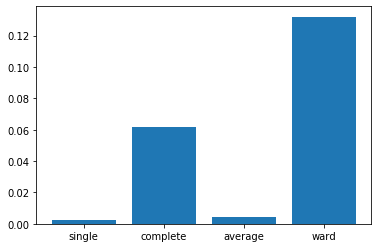

Wall time: 11.6 s


In [32]:
%%time
#test sur un vrai graphe

s=time()
node,edge,group=extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt",r"data/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt")
e=time()
print("TIME generate graph (sec):",e-s)

nbcluster=len(group)

link=['single','complete','average','ward']

s=time()
Mdata=into_matrix_nn(node,edge)
e=time()
print("TIME extract features (sec):",e-s)

s=time()
Mlabel=label_matrix(node, group)
e=time()
print("TIME extract labels (sec):",e-s)

score=[]
for li in link:
    
    s=time()
    ac=AgglomerativeClustering(n_clusters=nbcluster,linkage=li,affinity='euclidean').fit(Mdata)
    e=time()
    print("TIME perform Agglomerative Clustering (linkage={}) (sec): {}".format(li,e-s))

    LABELS=ac.labels_
    
    sc=adjusted_rand_score(Mlabel,LABELS)
    print("adjusted_random_score (linkage={}) : {}".format(li,sc))
    score.append(sc)

# s=time()
# predictgroup=matrix_to_group(LABELS)
# e=time()
# print("TIME labels into groups (sec):",e-s)

# draw_graph(node,edge,predictgroup)

# print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

plt.bar(link,score)
plt.show()

### DBSCAN

C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


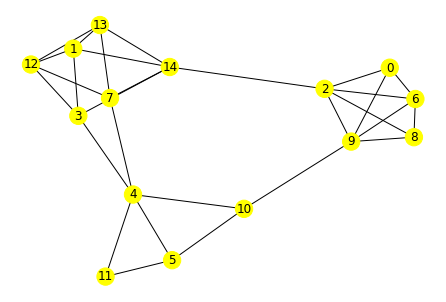

predict group : [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]]
adjusted random score :  0.0


In [30]:
#test sur un petit graph

node,edge,group=extract_graph(r"data/test_mini_graph/test_min_graph.txt",r"data/test_mini_graph/test_min_graph_labels.txt")

paraeps=3
paraminsamples=9

Mdata=into_matrix_nn(node,edge)

Mlabel=label_matrix(node, group)

dbscan=DBSCAN(eps=paraeps,min_samples=paraminsamples).fit(Mdata)

LABELS=dbscan.labels_

predictgroup=matrix_to_group(LABELS)

draw_graph(node,edge,predictgroup)

print("predict group :",predictgroup)
print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


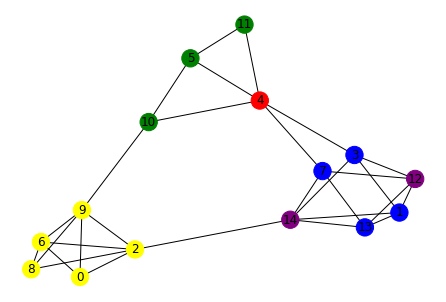

predict group : [[0, 2, 6, 8, 9], [1, 3, 7, 13], [4], [5, 10, 11], [12, 14]]
emax : 1.7365400000000002  - mmax : 1.0
adjusted random score :  0.7193195625759417


In [41]:
#test sur un petit graph

node,edge,group=extract_graph(r"data/test_mini_graph/test_min_graph.txt",r"data/test_mini_graph/test_min_graph_labels.txt")

e=np.linspace(0.01,5,1001)
m=np.linspace(1,30,30)

scmax=-100
emax=-1
mmax=-1

Mdata=into_matrix_nn(node,edge)

Mlabel=label_matrix(node, group)

for ee in e:
    for mm in m:
        paraeps=ee
        paraminsamples=mm

        dbscan=DBSCAN(eps=paraeps,min_samples=paraminsamples).fit(Mdata)

        LABELS=dbscan.labels_

        predictgroup=matrix_to_group(LABELS)
        
        sc=adjusted_rand_score(Mlabel,LABELS)
        
        if sc>scmax:
            scmax=sc
            emax=ee
            mmax=mm
        
paraeps=emax
paraminsamples=mmax

dbscan=DBSCAN(eps=paraeps,min_samples=paraminsamples).fit(Mdata)

LABELS=dbscan.labels_

predictgroup=matrix_to_group(LABELS)

draw_graph(node,edge,predictgroup)

print("predict group :",predictgroup)
print("emax :",emax," - mmax :",mmax)
print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


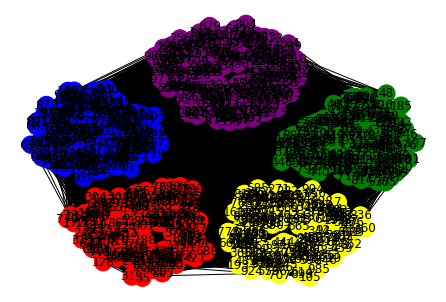

emax : 12.2  - mmax : 1.0
adjusted random score :  1.0
Wall time: 9min 44s


In [21]:
%%time
#test sur un graphe aléatoire plus grand (on trouve eps et min_samples 'idéal')

node,edge,group=random_graph_generator(1000,5)

e=np.linspace(10,15,51)
m=np.linspace(1,5,5)

scmax=-100
emax=-1
mmax=-1

Mdata=into_matrix_nn(node,edge)

Mlabel=label_matrix(node, group)

ite=0
totalite=len(e)*len(m)
crttime=0

for mm in m:
    for ee in e:
        ite+=1
        
        strt=time()
        paraeps=ee
        paraminsamples=mm

        dbscan=DBSCAN(eps=paraeps,min_samples=paraminsamples).fit(Mdata)

        LABELS=dbscan.labels_

        predictgroup=matrix_to_group(LABELS)
        
        sc=adjusted_rand_score(Mlabel,LABELS)
        
        if sc>scmax:
            scmax=sc
            emax=ee
            mmax=mm
        ed=time()
        
        crttime+=(ed-strt)
        estimtotaltime=totalite*crttime/ite
        
        print("iteration {}/{} eps={} minsample={} || ".format(ite,totalite,int(paraeps*10000)/10000,paraminsamples),end='')
        print("time : {} s   estimated total time : {} s                            ".format(int(crttime*10)/10,int(estimtotaltime*10)/10),end='\r')
        #print(" ",end='')
        
paraeps=emax
paraminsamples=mmax

dbscan=DBSCAN(eps=paraeps,min_samples=paraminsamples).fit(Mdata)

LABELS=dbscan.labels_

predictgroup=matrix_to_group(LABELS)

draw_graph(node,edge,predictgroup)

#print("predict group :",predictgroup)
print("emax :",emax," - mmax :",mmax)
print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

TIME generate graph (sec): 0.6881587505340576
TIME extract features (sec): 0.028923749923706055
TIME extract labels (sec): 0.0
TIME perform dbscan (sec): 2.2802724838256836
TIME labels into groups (sec): 0.0010006427764892578


C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


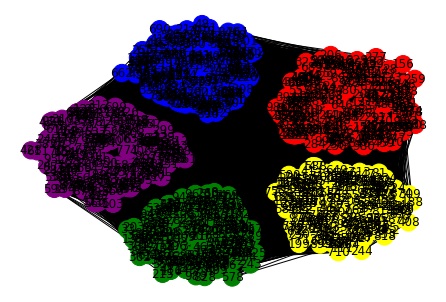

adjusted random score :  1.0
Wall time: 15.5 s


In [22]:
%%time
#test sur un graphe aléatoire plus grand

paraeps=12.2
paraminsamples=1

s=time()
node,edge,group=random_graph_generator(1000,5)
e=time()
print("TIME generate graph (sec):",e-s)

s=time()
Mdata=into_matrix_nn(node,edge)
e=time()
print("TIME extract features (sec):",e-s)

s=time()
Mlabel=label_matrix(node, group)
e=time()
print("TIME extract labels (sec):",e-s)

s=time()
dbscan=DBSCAN(eps=paraeps,min_samples=paraminsamples).fit(Mdata)
e=time()
print("TIME perform dbscan (sec):",e-s)

LABELS=dbscan.labels_

s=time()
predictgroup=matrix_to_group(LABELS)
e=time()
print("TIME labels into groups (sec):",e-s)

draw_graph(node,edge,predictgroup)

print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


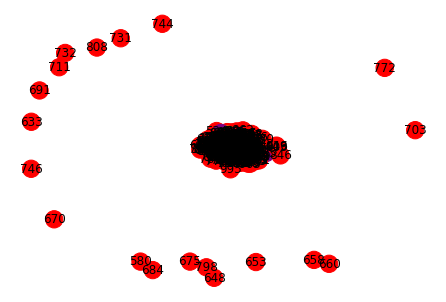

emax : 1.0593000000000001  - mmax : 1.0
adjusted random score :  0.007998133507236872
Wall time: 17min 59s


In [29]:
%%time
#test sur un vrai graphe (on trouve eps et min_samples 'idéal')

node,edge,group=extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt",r"data/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt")

e=np.linspace(0.01,15,101)
m=np.linspace(1,5,5)

scmax=-100
emax=-1
mmax=-1

Mdata=into_matrix_nn(node,edge)

Mlabel=label_matrix(node, group)

ite=0
totalite=len(e)*len(m)
crttime=0

for mm in m:
    for ee in e:
        ite+=1
        
        strt=time()
        paraeps=ee
        paraminsamples=mm

        dbscan=DBSCAN(eps=paraeps,min_samples=paraminsamples).fit(Mdata)

        LABELS=dbscan.labels_

        predictgroup=matrix_to_group(LABELS)
        
        sc=adjusted_rand_score(Mlabel,LABELS)
        
        if sc>scmax:
            scmax=sc
            emax=ee
            mmax=mm
        ed=time()
        
        crttime+=(ed-strt)
        estimtotaltime=totalite*crttime/ite
        
        print("iteration {}/{} eps={} minsample={} || ".format(ite,totalite,int(paraeps*10000)/10000,paraminsamples),end='')
        print("time : {} s   estimated total time : {} s                                      ".format(int(crttime*10)/10,int(estimtotaltime*10)/10),end='\r')
        
        
paraeps=emax
paraminsamples=mmax

dbscan=DBSCAN(eps=paraeps,min_samples=paraminsamples).fit(Mdata)

LABELS=dbscan.labels_

predictgroup=matrix_to_group(LABELS)

draw_graph(node,edge,predictgroup)

#print("predict group :",predictgroup)
print("emax :",emax," - mmax :",mmax)
print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

TIME generate graph (sec): 8.506726741790771
TIME extract features (sec): 0.006981611251831055
TIME extract labels (sec): 0.0010101795196533203
TIME perform dbscan (sec): 1.018235683441162
TIME labels into groups (sec): 0.007978439331054688


C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


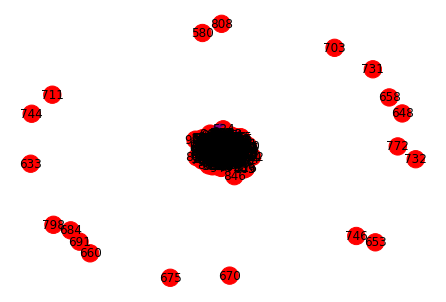

adjusted random score :  0.007998133507236872
Wall time: 17.7 s


In [30]:
%%time
#test sur un vrai graphe

paraeps=1.059
paraminsamples=1

s=time()
node,edge,group=extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt",r"data/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt")
e=time()
print("TIME generate graph (sec):",e-s)

s=time()
Mdata=into_matrix_nn(node,edge)
e=time()
print("TIME extract features (sec):",e-s)

s=time()
Mlabel=label_matrix(node, group)
e=time()
print("TIME extract labels (sec):",e-s)

s=time()
dbscan=DBSCAN(eps=paraeps,min_samples=paraminsamples).fit(Mdata)
e=time()
print("TIME perform dbscan (sec):",e-s)

LABELS=dbscan.labels_

s=time()
predictgroup=matrix_to_group(LABELS)
e=time()
print("TIME labels into groups (sec):",e-s)

draw_graph(node,edge,predictgroup)

print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

### hdbscan

C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


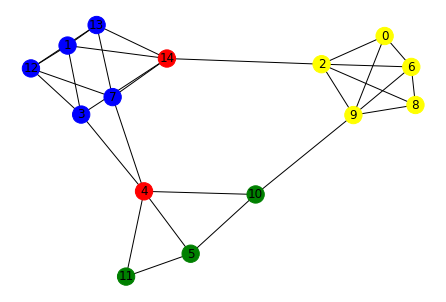

predict group : [[0, 2, 6, 8, 9], [1, 3, 7, 12, 13], [4, 14], [5, 10, 11]]
adjusted random score :  0.7795661301609517


In [9]:
#test sur un petit graph

node,edge,group=extract_graph(r"data/test_mini_graph/test_min_graph.txt",r"data/test_mini_graph/test_min_graph_labels.txt")

para=2

Mdata=into_matrix_nn(node,edge)

Mlabel=label_matrix(node, group)

hdbscan_=hdbscan.HDBSCAN(min_cluster_size=para).fit(Mdata)

LABELS=hdbscan_.labels_

predictgroup=matrix_to_group(LABELS)

draw_graph(node,edge,predictgroup)

print("predict group :",predictgroup)
print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


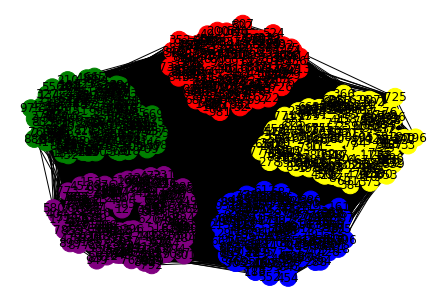

paramax : 2
adjusted random score :  1.0
Wall time: 4min 21s


In [11]:
%%time
#test sur un graphe aléatoire plus grand (on trouve min_cluster_size 'idéal')

node,edge,group=random_graph_generator(1000,5)

scmax=-100
paramax=-1
n=100

Mdata=into_matrix_nn(node,edge)

Mlabel=label_matrix(node, group)

ite=0
totalite=n-1
crttime=0

for para in range(2,n+1):
    ite+=1

    strt=time()

    hdbscan_=hdbscan.HDBSCAN(min_cluster_size=para).fit(Mdata)

    LABELS=hdbscan_.labels_

    predictgroup=matrix_to_group(LABELS)

    sc=adjusted_rand_score(Mlabel,LABELS)

    if sc>scmax:
        scmax=sc
        paramax=para
    ed=time()

    crttime+=(ed-strt)
    estimtotaltime=totalite*crttime/ite

    print("iteration {}/{} min_clust_size={} || ".format(ite,totalite,para),end='')
    print("time : {} s   estimated total time : {} s                            ".format(int(crttime*10)/10,int(estimtotaltime*10)/10),end='\r')
        
        

hdbscan_=hdbscan.HDBSCAN(min_cluster_size=paramax).fit(Mdata)

LABELS=hdbscan_.labels_

predictgroup=matrix_to_group(LABELS)

draw_graph(node,edge,predictgroup)

#print("predict group :",predictgroup)
print("paramax :",paramax)
print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

C:\Users\sgaumi_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


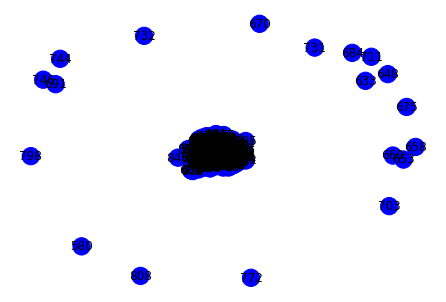

paramax : 21
adjusted random score :  0.003106318530709579
Wall time: 4min 46s


In [12]:
%%time
#test sur un vrai graphe (on trouve min_cluster_size 'idéal')

node,edge,group=extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt",r"data/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt")

scmax=-100
paramax=-1
n=100

Mdata=into_matrix_nn(node,edge)

Mlabel=label_matrix(node, group)

ite=0
totalite=n-1
crttime=0

for para in range(2,n+1):
    ite+=1

    strt=time()

    hdbscan_=hdbscan.HDBSCAN(min_cluster_size=para).fit(Mdata)

    LABELS=hdbscan_.labels_

    predictgroup=matrix_to_group(LABELS)

    sc=adjusted_rand_score(Mlabel,LABELS)

    if sc>scmax:
        scmax=sc
        paramax=para
    ed=time()

    crttime+=(ed-strt)
    estimtotaltime=totalite*crttime/ite

    print("iteration {}/{} min_clust_size={} || ".format(ite,totalite,para),end='')
    print("time : {} s   estimated total time : {} s                            ".format(int(crttime*10)/10,int(estimtotaltime*10)/10),end='\r')
        
        

hdbscan_=hdbscan.HDBSCAN(min_cluster_size=paramax).fit(Mdata)

LABELS=hdbscan_.labels_

predictgroup=matrix_to_group(LABELS)

draw_graph(node,edge,predictgroup)

#print("predict group :",predictgroup)
print("paramax :",paramax)
print("adjusted random score : ",adjusted_rand_score(Mlabel,LABELS))

## 4) Comparaison

TIME generate graph (sec): 0.6733109951019287
TIME extract features (sec): 0.02892017364501953
TIME extract labels (sec): 0.0009713172912597656
TIME perform kmeans (sec): 0.3301084041595459
TIME labels into groups (sec): 0.0


C:\Users\sgaumi_\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


TIME perform Agglomerative Clustering (sec): 0.6677761077880859
TIME labels into groups (sec): 0.0
TIME perform dbscan (sec): 2.3124303817749023
TIME labels into groups (sec): 0.0009968280792236328
TIME perform hdbscan (sec): 1.8968238830566406
TIME labels into groups (sec): 0.000997781753540039


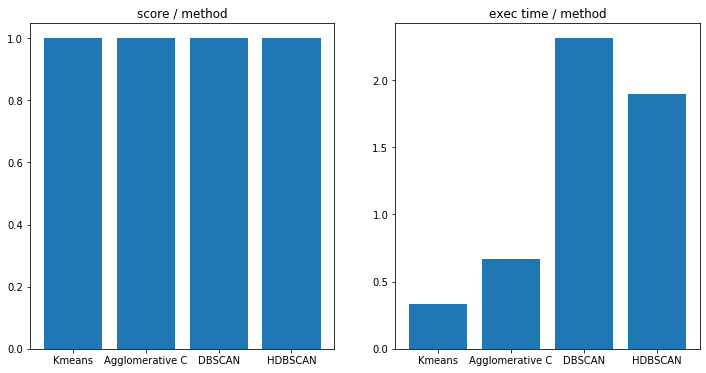

Wall time: 6.08 s


In [26]:
%%time
#test sur un graphe aléatoire généré

Lmethod=[]
Lscore=[]
Ltime=[]

s=time()
node,edge,group=random_graph_generator(1000,5)
e=time()
print("TIME generate graph (sec):",e-s)

s=time()
Mdata=into_matrix_nn(node,edge)
e=time()
print("TIME extract features (sec):",e-s)

s=time()
Mlabel=label_matrix(node, group)
e=time()
print("TIME extract labels (sec):",e-s)

####Kmeans###
Lmethod.append("Kmeans")

s=time()
kmeans=KMeans(n_clusters=5).fit(Mdata)
e=time()
print("TIME perform kmeans (sec):",e-s)
Ltime.append(e-s)

LABELSkmeans=kmeans.labels_

s=time()
predictgroupkmeans=matrix_to_group(LABELSkmeans)
e=time()
print("TIME labels into groups (sec):",e-s)

sckmeans=adjusted_rand_score(Mlabel,LABELSkmeans)
Lscore.append(sckmeans)
######

###Agglomerative Clustering###
Lmethod.append("Agglomerative C")

s=time()
ac=AgglomerativeClustering(n_clusters=5,linkage='ward',affinity='euclidean').fit(Mdata)
e=time()
print("TIME perform Agglomerative Clustering (sec): {}".format(e-s))
Ltime.append(e-s)

LABELSac=ac.labels_

s=time()
predictgroupac=matrix_to_group(LABELSac)
e=time()
print("TIME labels into groups (sec):",e-s)

scac=adjusted_rand_score(Mlabel,LABELSac)
Lscore.append(scac)
######

###DBSCAN###
Lmethod.append("DBSCAN")

s=time()
dbscan=DBSCAN(eps=12.2,min_samples=1).fit(Mdata)
e=time()
print("TIME perform dbscan (sec):",e-s)
Ltime.append(e-s)

LABELSdb=dbscan.labels_

s=time()
predictgroupdb=matrix_to_group(LABELSdb)
e=time()
print("TIME labels into groups (sec):",e-s)

scdb=adjusted_rand_score(Mlabel,LABELSdb)
Lscore.append(scdb)
######

###HDBSCAN###
Lmethod.append("HDBSCAN")

s=time()
hdbscan_=hdbscan.HDBSCAN(min_cluster_size=2).fit(Mdata)
e=time()
print("TIME perform hdbscan (sec):",e-s)
Ltime.append(e-s)

LABELShdb=hdbscan_.labels_

s=time()
predictgrouphdb=matrix_to_group(LABELShdb)
e=time()
print("TIME labels into groups (sec):",e-s)

schdb=adjusted_rand_score(Mlabel,LABELShdb)
Lscore.append(schdb)
######


fig=plt.figure(figsize=(12,6))

ax=fig.add_subplot(1,2,1)
ax.bar(Lmethod,Lscore)
ax.set_title("score / method")

ax=fig.add_subplot(1,2,2)
ax.bar(Lmethod,Ltime)
ax.set_title("exec time / method")

plt.show()

TIME generate graph (sec): 8.345979928970337
TIME extract features (sec): 0.007978439331054688
TIME extract labels (sec): 0.0010333061218261719
TIME perform kmeans (sec): 2.017948865890503
TIME labels into groups (sec): 0.0009975433349609375


C:\Users\sgaumi_\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


TIME perform Agglomerative Clustering (sec): 0.6702072620391846
TIME labels into groups (sec): 0.0009968280792236328
TIME perform dbscan (sec): 1.0313045978546143
TIME labels into groups (sec): 0.007978200912475586
TIME perform hdbscan (sec): 1.910245418548584
TIME labels into groups (sec): 0.0009975433349609375


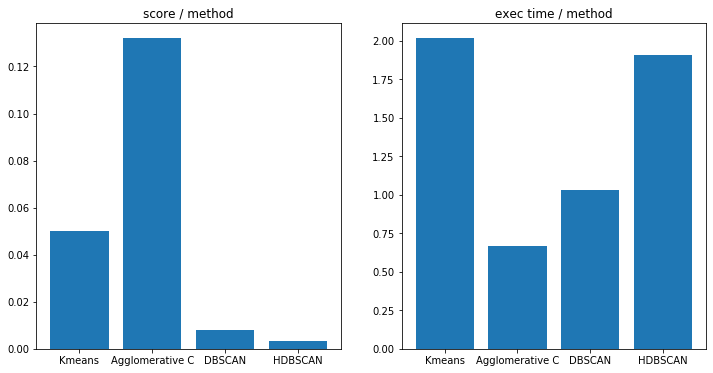

Wall time: 14.2 s


In [31]:
%%time
#test sur un vrai graphe

Lmethod=[]
Lscore=[]
Ltime=[]

s=time()
node,edge,group=extract_graph(r"data/email-Eu-core.txt/email-Eu-core.txt",r"data/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt")
e=time()
print("TIME generate graph (sec):",e-s)

nbcluster=len(group)

s=time()
Mdata=into_matrix_nn(node,edge)
e=time()
print("TIME extract features (sec):",e-s)

s=time()
Mlabel=label_matrix(node, group)
e=time()
print("TIME extract labels (sec):",e-s)

####Kmeans###
Lmethod.append("Kmeans")

s=time()
kmeans=KMeans(n_clusters=nbcluster).fit(Mdata)
e=time()
print("TIME perform kmeans (sec):",e-s)
Ltime.append(e-s)

LABELSkmeans=kmeans.labels_

s=time()
predictgroupkmeans=matrix_to_group(LABELSkmeans)
e=time()
print("TIME labels into groups (sec):",e-s)

sckmeans=adjusted_rand_score(Mlabel,LABELSkmeans)
Lscore.append(sckmeans)
######

###Agglomerative Clustering###
Lmethod.append("Agglomerative C")

s=time()
ac=AgglomerativeClustering(n_clusters=nbcluster,linkage='ward',affinity='euclidean').fit(Mdata)
e=time()
print("TIME perform Agglomerative Clustering (sec): {}".format(e-s))
Ltime.append(e-s)

LABELSac=ac.labels_

s=time()
predictgroupac=matrix_to_group(LABELSac)
e=time()
print("TIME labels into groups (sec):",e-s)

scac=adjusted_rand_score(Mlabel,LABELSac)
Lscore.append(scac)
######

###DBSCAN###
Lmethod.append("DBSCAN")

s=time()
dbscan=DBSCAN(eps=1.059,min_samples=1).fit(Mdata)
e=time()
print("TIME perform dbscan (sec):",e-s)
Ltime.append(e-s)

LABELSdb=dbscan.labels_

s=time()
predictgroupdb=matrix_to_group(LABELSdb)
e=time()
print("TIME labels into groups (sec):",e-s)

scdb=adjusted_rand_score(Mlabel,LABELSdb)
Lscore.append(scdb)
######

###HDBSCAN###
Lmethod.append("HDBSCAN")

s=time()
hdbscan_=hdbscan.HDBSCAN(min_cluster_size=21).fit(Mdata)
e=time()
print("TIME perform hdbscan (sec):",e-s)
Ltime.append(e-s)

LABELShdb=hdbscan_.labels_

s=time()
predictgrouphdb=matrix_to_group(LABELShdb)
e=time()
print("TIME labels into groups (sec):",e-s)

schdb=adjusted_rand_score(Mlabel,LABELShdb)
Lscore.append(schdb)
######


fig=plt.figure(figsize=(12,6))

ax=fig.add_subplot(1,2,1)
ax.bar(Lmethod,Lscore)
ax.set_title("score / method")

ax=fig.add_subplot(1,2,2)
ax.bar(Lmethod,Ltime)
ax.set_title("exec time / method")

plt.show()